# Add libraries

In [2]:

!pip install openpyxl


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [144]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Import data

In [96]:
pcoWoInf = pd.read_excel('D:/PCOS_diagnosis/raw_data/PCOS_data_without_infertility.xlsx', sheet_name=1)

In [59]:
pcoWInf = pd.read_csv('D:/PCOS_diagnosis/raw_data/PCOS_infertility.csv')

# Data preprocessing

## Head & tail

In [6]:
pcoWoInf.columns

Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)',
       'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions',
       '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)',
       'Unnamed: 44'],
      dtype='object')

In [8]:
pcoWoInf.head().style.background_gradient(cmap='gray')

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marraige Status (Yrs),Pregnant(Y/N),No. of aborptions,I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),FSH(mIU/mL),LH(mIU/mL),FSH/LH,Hip(inch),Waist(inch),Waist:Hip Ratio,TSH (mIU/L),AMH(ng/mL),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.600000,152.000000,19.300000,15,78,22,10.480000,2,5,7.000000,0,0,1.990000,1.990000,7.950000,3.680000,2.160326,36,30,0.833333,0.680000,2.070000,45.160000,17.100000,0.570000,92.000000,0,0,0,0,0,1.000000,0,110,80,3,3,18.000000,18.000000,8.500000,nan
1,2,2,0,36,65.000000,161.500000,24.921163,15,74,20,11.700000,2,5,11.000000,1,0,60.800000,1.990000,6.730000,1.090000,6.174312,38,32,0.842105,3.160000,1.530000,20.090000,61.300000,0.970000,92.000000,0,0,0,0,0,0.000000,0,120,70,3,5,15.000000,14.000000,3.700000,nan
2,3,3,1,33,68.800000,165.000000,25.270891,11,72,18,11.800000,2,5,10.000000,1,0,494.080000,494.080000,5.540000,0.880000,6.295455,40,36,0.900000,2.540000,6.630000,10.520000,49.700000,0.360000,84.000000,0,0,0,1,1,1.000000,0,120,80,13,15,18.000000,20.000000,10.000000,nan
3,4,4,0,37,65.000000,148.000000,29.674945,13,72,20,12.000000,2,5,4.000000,0,0,1.990000,1.990000,8.060000,2.360000,3.415254,42,36,0.857143,16.410000,1.220000,36.900000,33.400000,0.360000,76.000000,0,0,0,0,0,0.000000,0,120,70,2,2,15.000000,14.000000,7.500000,nan
4,5,5,0,25,52.000000,161.000000,20.060954,11,72,18,10.000000,2,5,1.000000,1,0,801.450000,801.450000,3.980000,0.900000,4.422222,37,30,0.810811,3.570000,2.260000,30.090000,43.800000,0.380000,84.000000,0,0,0,1,0,0.000000,0,120,80,3,4,16.000000,14.000000,7.000000,nan


In [9]:
pcoWoInf.tail().style.background_gradient(cmap='gray')

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marraige Status (Yrs),Pregnant(Y/N),No. of aborptions,I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),FSH(mIU/mL),LH(mIU/mL),FSH/LH,Hip(inch),Waist(inch),Waist:Hip Ratio,TSH (mIU/L),AMH(ng/mL),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
536,537,537,0,35,50.000000,164.592000,18.500000,17,72,16,11.000000,2,5,8.000000,0,1,1.990000,1.990000,10.060000,1.810000,5.558011,28,26,0.928571,1.110000,1.700000,5.300000,36.600000,0.250000,92.000000,0,0,0,0,0,0.000000,0,110,70,1,0,17.500000,10.000000,6.700000,nan
537,538,538,0,30,63.200000,158.000000,25.300000,15,72,18,10.800000,2,5,4.000000,1,1,80.130000,1.990000,5.070000,2.840000,1.785211,34,32,0.941176,2.050000,5.600000,21.090000,23.000000,0.250000,108.000000,1,0,0,0,0,0.000000,0,110,70,9,7,19.000000,18.000000,8.200000,nan
538,539,539,0,36,54.000000,152.000000,23.400000,13,74,20,10.800000,2,6,8.000000,0,0,1.990000,1.990000,11.960000,2.780000,4.302158,30,28,0.933333,2.870000,3.700000,96.410000,22.500000,0.250000,92.000000,0,0,0,0,0,0.000000,0,110,80,1,0,18.000000,9.000000,7.300000,nan
539,540,540,0,27,50.000000,150.000000,22.200000,15,74,20,12.000000,4,2,2.000000,0,0,292.920000,1.990000,4.400000,4.330000,1.016166,28,26,0.928571,2.500000,5.200000,38.890000,22.400000,0.250000,115.000000,0,0,0,0,1,0.000000,0,110,70,7,6,18.000000,16.000000,11.500000,nan
540,541,541,1,23,82.000000,165.000000,30.100000,13,80,20,10.200000,4,7,2.000000,0,0,1.990000,1.990000,3.990000,4.300000,0.927907,48,46,0.958333,1.660000,20,20.740000,17.400000,0.370000,108.000000,1,1,1,1,1,1.000000,0,120,70,9,10,19.000000,18.000000,6.900000,nan


In [10]:
pcoWInf.columns

Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', '  I   beta-HCG(mIU/mL)',
       'II    beta-HCG(mIU/mL)', 'AMH(ng/mL)'],
      dtype='object')

In [12]:
pcoWInf.head().style.background_gradient(cmap='gray')

,Sl. No,Patient File No.,PCOS (Y/N),I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),AMH(ng/mL)
0,1,10001,0,1.990000,1.990000,2.07
1,2,10002,0,60.800000,1.990000,1.53
2,3,10003,1,494.080000,494.080000,6.63
3,4,10004,0,1.990000,1.990000,1.22
4,5,10005,0,801.450000,801.450000,2.26


In [13]:
pcoWInf.tail().style.background_gradient(cmap='gray')

,Sl. No,Patient File No.,PCOS (Y/N),I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),AMH(ng/mL)
536,537,10537,0,1.990000,1.990000,1.7
537,538,10538,0,80.130000,1.990000,5.6
538,539,10539,0,1.990000,1.990000,3.7
539,540,10540,0,292.920000,1.990000,5.2
540,541,10541,1,1.990000,1.990000,20


## Is there common data between two tables?

In [35]:
# We want to investigate that "Is there common data between the two tables?"
merged_data = pd.merge(pcoWoInf, pcoWInf, on='Patient File No.', suffixes=('_pcoWoInf', '_pcoWInf'), how='inner')

In [36]:
merged_data.head()

,Sl. No_pcoWoInf,Patient File No.,PCOS (Y/N)_pcoWoInf,Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44,Sl. No_pcoWInf,PCOS (Y/N)_pcoWInf,I beta-HCG(mIU/mL)_pcoWInf,II beta-HCG(mIU/mL)_pcoWInf,AMH(ng/mL)_pcoWInf


In [40]:
# There is no common data between the two tables. So I am only going to analyze 'pcoWoinf'

## Get more information about columns

In [39]:
pcoWoInf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

### Correct data type

In [41]:
# We found that the data type of two columns is 'object,' but these columns consist of numeric values. Therefore, we should change it
pcoWoInf['II    beta-HCG(mIU/mL)'] = pd.to_numeric(pcoWoInf['II    beta-HCG(mIU/mL)'])

ValueError: Unable to parse string "1.99." at position 123

In [51]:
# We encountered an error. First, we need to understand what the normal range is for these specific columns.
pcoWoInf['II    beta-HCG(mIU/mL)']

0        1.99
1        1.99
2      494.08
3        1.99
4      801.45
        ...  
536      1.99
537      1.99
538      1.99
539      1.99
540      1.99
Name: II    beta-HCG(mIU/mL), Length: 541, dtype: object

In [65]:
#Therefor we must remove "." from the end of the "1.99."

In [67]:
#There are two different ways for loading this specific row
# 1:
pcoWoInf[pcoWoInf['II    beta-HCG(mIU/mL)']=='1.99.']

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
123,124,124,1,23,40.0,150.0,17.777778,15,74,18,...,1.0,1,100,70,10,13,18.0,17.0,12.5,NaN


In [66]:
# 2:
pcoWoInf.iloc[123]

Sl. No                          124
Patient File No.                124
PCOS (Y/N)                        1
 Age (yrs)                       23
Weight (Kg)                    40.0
Height(Cm)                    150.0
BMI                       17.777778
Blood Group                      15
Pulse rate(bpm)                  74
RR (breaths/min)                 18
Hb(g/dl)                       10.8
Cycle(R/I)                        2
Cycle length(days)                5
Marraige Status (Yrs)           2.0
Pregnant(Y/N)                     0
No. of aborptions                 0
  I   beta-HCG(mIU/mL)         1.99
II    beta-HCG(mIU/mL)        1.99.
FSH(mIU/mL)                     5.0
LH(mIU/mL)                     5.15
FSH/LH                     0.970874
Hip(inch)                        46
Waist(inch)                      38
Waist:Hip Ratio            0.826087
TSH (mIU/L)                    1.69
AMH(ng/mL)                     19.8
PRL(ng/mL)                    15.23
Vit D3 (ng/mL)              

In [68]:
# We will correct the value
pcoWoInf['II    beta-HCG(mIU/mL)'][pcoWoInf['II    beta-HCG(mIU/mL)']=='1.99.'] = '1.99'

C:\Users\rahim\AppData\Local\Temp\ipykernel_16508\190739650.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pcoWoInf['II    beta-HCG(mIU/mL)'][pcoWoInf['II    beta-HCG(mIU/mL)']=='1.99.'] = '1.99'


In [71]:
# Check the value
pcoWoInf.iloc[123]

Sl. No                          124
Patient File No.                124
PCOS (Y/N)                        1
 Age (yrs)                       23
Weight (Kg)                    40.0
Height(Cm)                    150.0
BMI                       17.777778
Blood Group                      15
Pulse rate(bpm)                  74
RR (breaths/min)                 18
Hb(g/dl)                       10.8
Cycle(R/I)                        2
Cycle length(days)                5
Marraige Status (Yrs)           2.0
Pregnant(Y/N)                     0
No. of aborptions                 0
  I   beta-HCG(mIU/mL)         1.99
II    beta-HCG(mIU/mL)         1.99
FSH(mIU/mL)                     5.0
LH(mIU/mL)                     5.15
FSH/LH                     0.970874
Hip(inch)                        46
Waist(inch)                      38
Waist:Hip Ratio            0.826087
TSH (mIU/L)                    1.69
AMH(ng/mL)                     19.8
PRL(ng/mL)                    15.23
Vit D3 (ng/mL)              

In [72]:
# Let's try again to change the data type
pcoWoInf['II    beta-HCG(mIU/mL)'] = pd.to_numeric(pcoWoInf['II    beta-HCG(mIU/mL)'])

In [97]:
# Change the data type of second column
pcoWoInf['AMH(ng/mL)'] = pd.to_numeric(pcoWoInf['AMH(ng/mL)'])

ValueError: Unable to parse string "a" at position 305

In [93]:
pcoWoInf.iloc[305]

Sl. No                          306
Patient File No.                306
PCOS (Y/N)                        0
 Age (yrs)                       37
Weight (Kg)                    56.0
Height(Cm)                    152.0
BMI                       24.238227
Blood Group                      13
Pulse rate(bpm)                  74
RR (breaths/min)                 20
Hb(g/dl)                       11.7
Cycle(R/I)                        2
Cycle length(days)                5
Marraige Status (Yrs)           9.0
Pregnant(Y/N)                     0
No. of aborptions                 0
  I   beta-HCG(mIU/mL)         42.0
II    beta-HCG(mIU/mL)         1.99
FSH(mIU/mL)                    2.91
LH(mIU/mL)                     0.35
FSH/LH                     8.314286
Hip(inch)                        35
Waist(inch)                      33
Waist:Hip Ratio            0.942857
TSH (mIU/L)                    16.0
AMH(ng/mL)                      5.6
PRL(ng/mL)                     2.22
Vit D3 (ng/mL)              

In [84]:
pcoWoInf['AMH(ng/mL)']

<bound method Series.max of 0      2.07
1      1.53
2      6.63
3      1.22
4      2.26
       ... 
536     1.7
537     5.6
538     3.7
539     5.2
540      20
Name: AMH(ng/mL), Length: 541, dtype: object>

In [87]:
# With the help of MS Excel, I determined that the average of this column is 5.6. Therefore, I will replace 'a' with the average number.
pcoWoInf['AMH(ng/mL)'][pcoWoInf['AMH(ng/mL)'] == 'a'] = '5.6'

C:\Users\rahim\AppData\Local\Temp\ipykernel_16508\1953760081.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pcoWoInf['AMH(ng/mL)'][pcoWoInf['AMH(ng/mL)'] == 'a'] = '5.6'


In [90]:
pcoWoInf['AMH(ng/mL)'] = pd.to_numeric(pcoWoInf['AMH(ng/mL)'])

In [91]:
pcoWoInf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

In [104]:
# To resolve the error, we can use the following codes. This approach is very practical
pcoWoInf["AMH(ng/mL)"] = pd.to_numeric(pcoWoInf["AMH(ng/mL)"], errors='coerce')
pcoWoInf["II    beta-HCG(mIU/mL)"] = pd.to_numeric(pcoWoInf["II    beta-HCG(mIU/mL)"], errors='coerce')

### Filling some missing value

In [107]:
# For each column, the total number of non-null values must be 541. However, for two columns, this value is 540. Therefore, we have one null value in each column, and we should fill them
pcoWoInf['Marraige Status (Yrs)'].fillna(pcoWoInf['Marraige Status (Yrs)'].mean(),inplace=True)

In [111]:
pcoWoInf['Fast food (Y/N)'].fillna(pcoWoInf['Fast food (Y/N)'].mode(), inplace=True)

In [113]:
# Check the result
pcoWoInf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   541 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

### Cleaning column name (remove leading and trailing whitespaces)

In [118]:
pcoWoInf.columns = [col.strip() for col in pcoWoInf.columns]

In [120]:
pcoWoInf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3   Age (yrs)               541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   541 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

# Data Exploration

In [115]:
pcoWoInf.describe()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Hair loss(Y/N),Pimples(Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,...,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,271.000000,271.000000,0.327172,31.430684,59.637153,156.484835,24.311285,13.802218,73.247689,19.243993,...,0.452865,0.489834,0.247689,114.661738,76.927911,6.129390,6.641405,15.018115,15.451701,8.475915
std,156.317519,156.317519,0.469615,5.411006,11.028287,6.033545,4.056399,1.840812,4.430285,1.688629,...,0.498234,0.500359,0.432070,7.384556,5.574112,4.229294,4.436889,3.566839,3.318848,2.165381
min,1.000000,1.000000,0.000000,20.000000,31.000000,137.000000,12.417882,11.000000,13.000000,16.000000,...,0.000000,0.000000,0.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,136.000000,136.000000,0.000000,28.000000,52.000000,152.000000,21.641274,13.000000,72.000000,18.000000,...,0.000000,0.000000,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000
50%,271.000000,271.000000,0.000000,31.000000,59.000000,156.000000,24.238227,14.000000,72.000000,18.000000,...,0.000000,0.000000,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000
75%,406.000000,406.000000,1.000000,35.000000,65.000000,160.000000,26.634958,15.000000,74.000000,20.000000,...,1.000000,1.000000,0.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000
max,541.000000,541.000000,1.000000,48.000000,108.000000,180.000000,38.900000,18.000000,82.000000,28.000000,...,1.000000,1.000000,1.000000,140.000000,100.000000,22.000000,20.000000,24.000000,24.000000,18.000000


In [128]:
# Convert non-numeric columns to numeric if possible
pcoWoInf_numeric = pcoWoInf.apply(pd.to_numeric, errors='ignore')

In [132]:
# Drop non-numeric columns
pcoWoInf_numeric = pcoWoInf_numeric.select_dtypes(include='number')

In [133]:
# Calculate the correlation matrix
corrmat = pcoWoInf_numeric.corr()

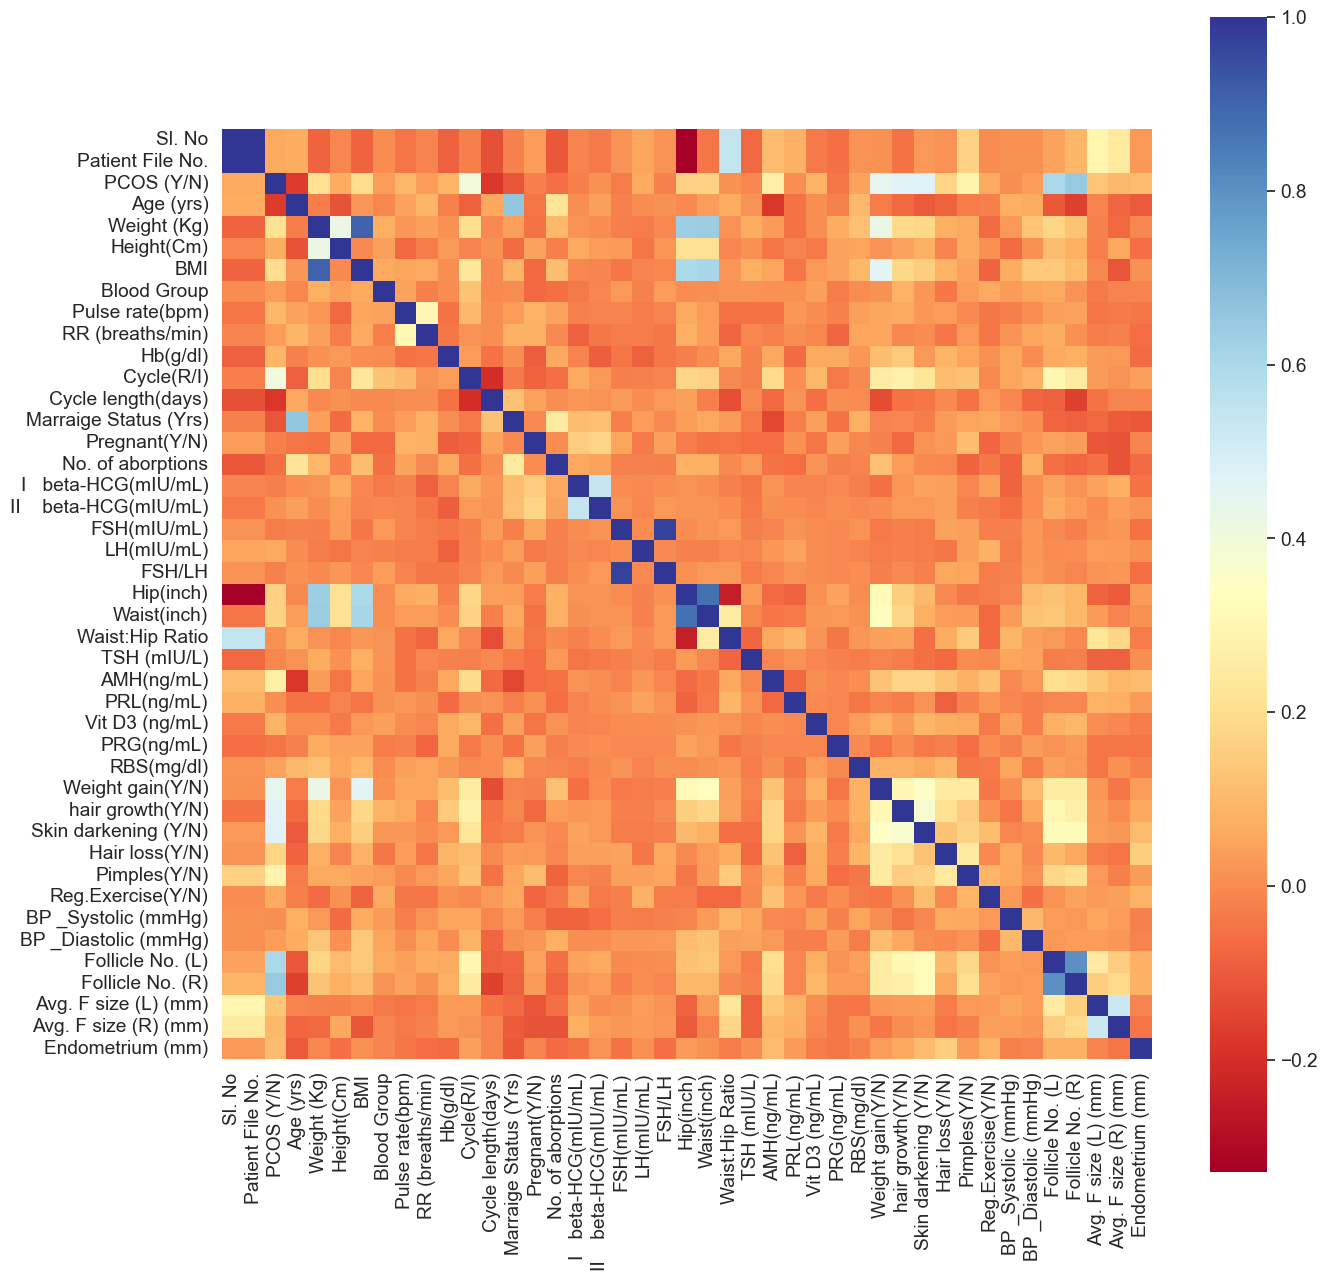

In [149]:
# Plot the heatmap
plt.figure(figsize=(15,15))
sns.heatmap(corrmat, cmap="RdYlBu", square=True)
plt.show()

In [143]:
corrmat["PCOS (Y/N)"].sort_values(ascending=False)

PCOS (Y/N)                1.000000
Follicle No. (R)          0.648327
Follicle No. (L)          0.603346
Skin darkening (Y/N)      0.475733
hair growth(Y/N)          0.464667
Weight gain(Y/N)          0.441047
Cycle(R/I)                0.401644
Pimples(Y/N)              0.286077
AMH(ng/mL)                0.263863
Weight (Kg)               0.211938
BMI                       0.199534
Hair loss(Y/N)            0.172879
Waist(inch)               0.164598
Hip(inch)                 0.162297
Avg. F size (L) (mm)      0.132992
Endometrium (mm)          0.106648
Avg. F size (R) (mm)      0.097690
Pulse rate(bpm)           0.091821
Hb(g/dl)                  0.087170
Vit D3 (ng/mL)            0.085494
Height(Cm)                0.068254
Reg.Exercise(Y/N)         0.065337
LH(mIU/mL)                0.063879
Sl. No                    0.060998
Patient File No.          0.060998
RBS(mg/dl)                0.048922
BP _Diastolic (mmHg)      0.038032
RR (breaths/min)          0.036928
Blood Group         

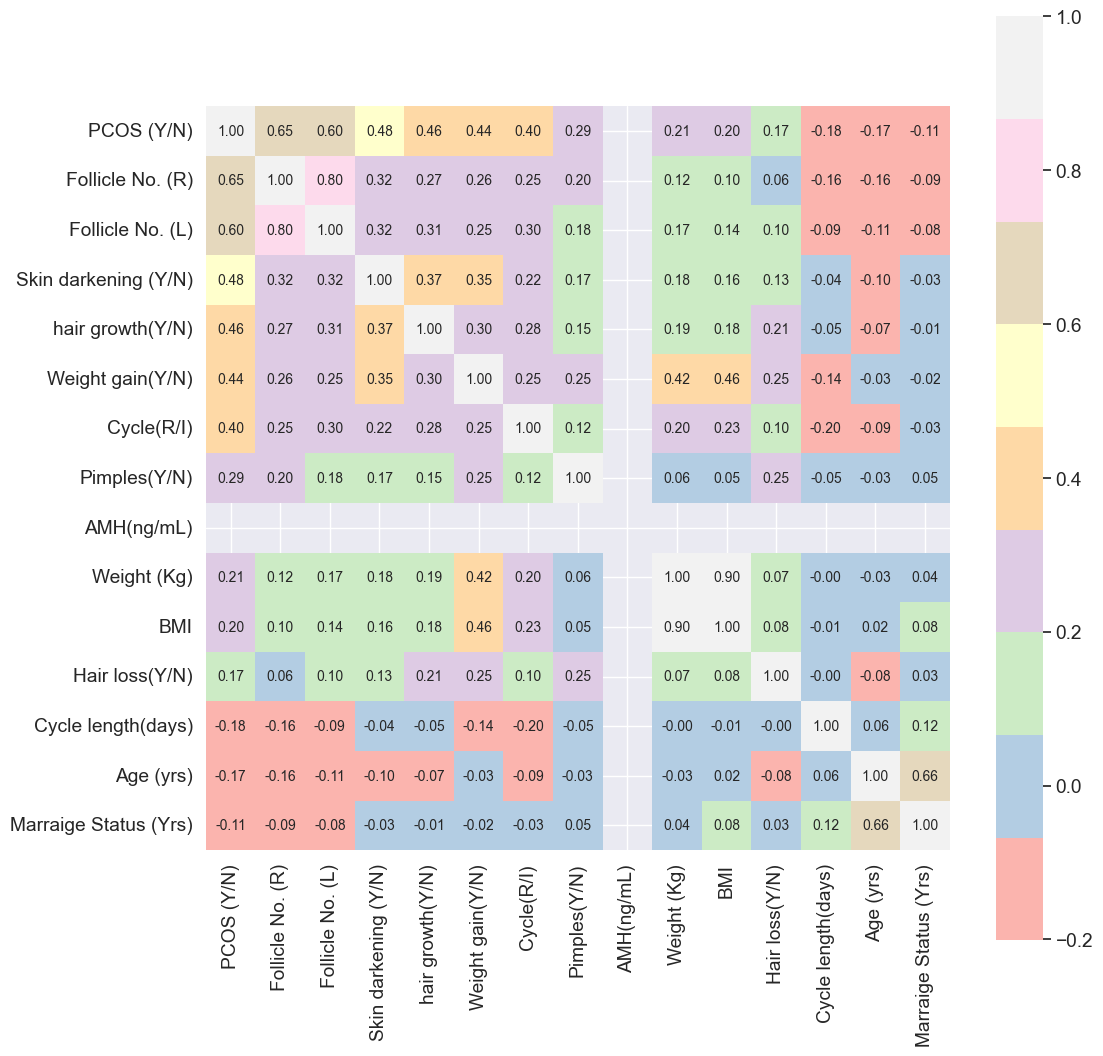

In [145]:
plt.figure(figsize=(12,12))
k = 12 #number of variables with positive for heatmap
l = 3 #number of variables with negative for heatmap
cols_p = corrmat.nlargest(k, "PCOS (Y/N)")["PCOS (Y/N)"].index 
cols_n = corrmat.nsmallest(l, "PCOS (Y/N)")["PCOS (Y/N)"].index
cols = cols_p.append(cols_n) 

cm = np.corrcoef(pcoWoInf_numeric[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True,cmap="Pastel1", annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

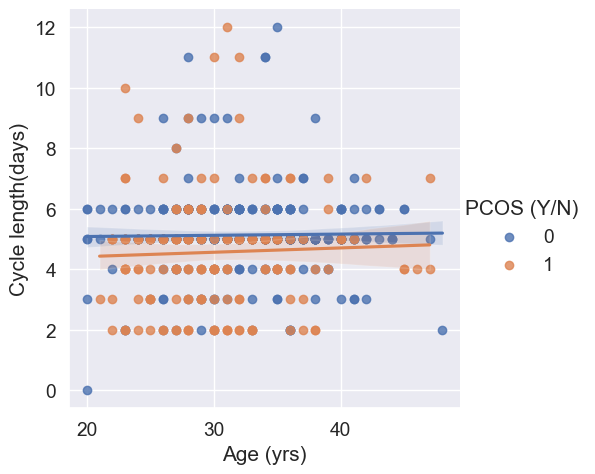

In [153]:
sns.lmplot(data=pcoWoInf,x="Age (yrs)",y="Cycle length(days)", hue="PCOS (Y/N)")

In [ ]:
# The length of the menstrual phase is overall consistent over different ages for normal cases. Whereas in the case of PCOD the length increased with age.

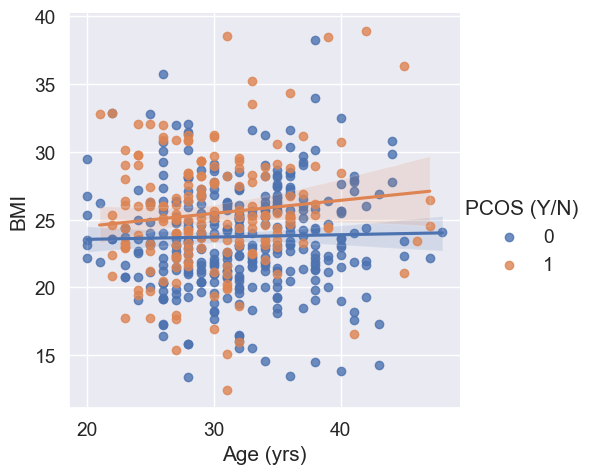

In [154]:
sns.lmplot(data=pcoWoInf,x="Age (yrs)",y="BMI", hue="PCOS (Y/N)")

In [ ]:
# Body mass index (BMI) is showing consistency for normal cases. Whereas for PCOS the BMI increases with age.

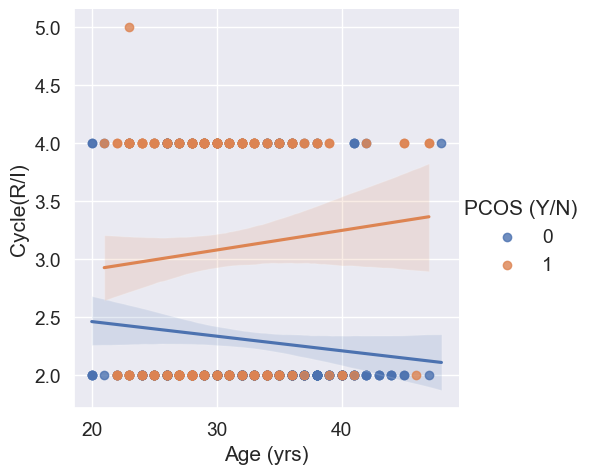

In [155]:
sns.lmplot(data=pcoWoInf,x="Age (yrs)",y="Cycle(R/I)", hue="PCOS (Y/N)")

In [ ]:
# The mensural cycle becomes more regular for normal cases with age. Whereas, for PCOS the irregularity increases with age.

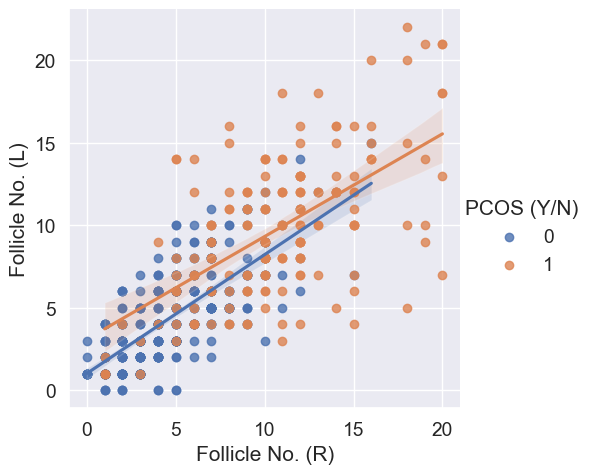

In [158]:
sns.lmplot(data=pcoWoInf,x="Follicle No. (R)",y="Follicle No. (L)", hue="PCOS (Y/N)")

In [ ]:
# The distribution of follicles in both ovaries Left and Right are not equal for women with PCOS in comparison with the "Normal" patient. Thia is curious let's exlore it with boxen plot.
# The number of follicles in women with PCOS is higher, as expected. And are unequal as well.

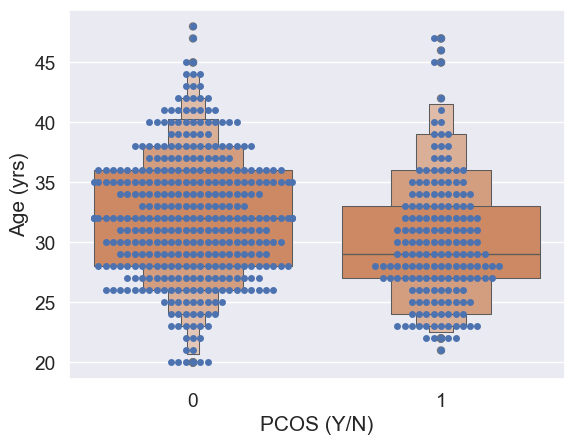

c:\Users\rahim\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3398: UserWarning: 8.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


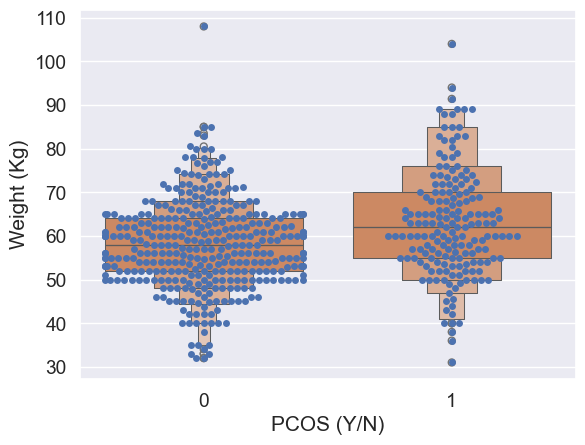

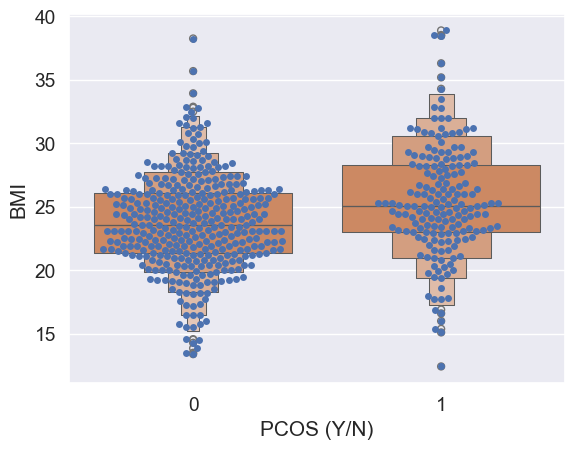

c:\Users\rahim\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3398: UserWarning: 21.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


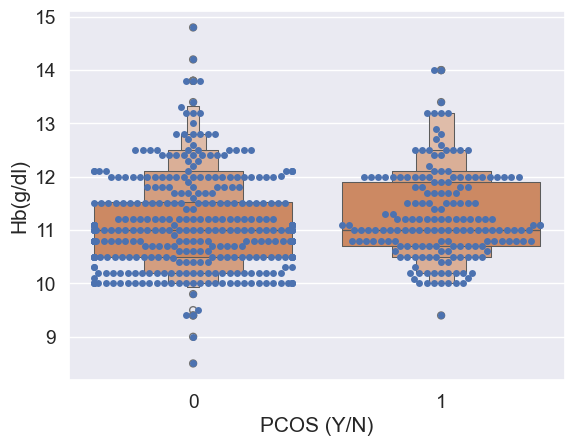

c:\Users\rahim\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3398: UserWarning: 53.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\rahim\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3398: UserWarning: 7.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\rahim\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3398: UserWarning: 65.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\rahim\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3398: UserWarning: 26.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg

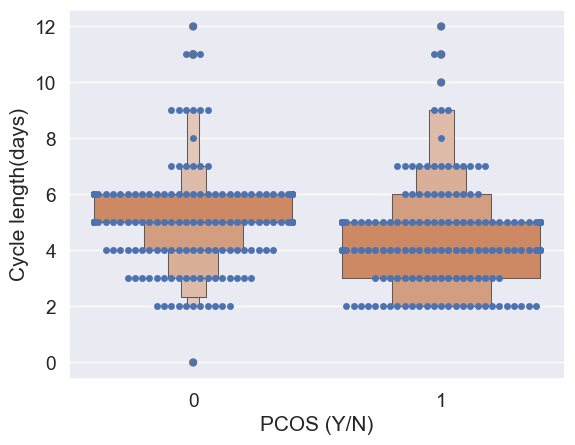

c:\Users\rahim\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3398: UserWarning: 12.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


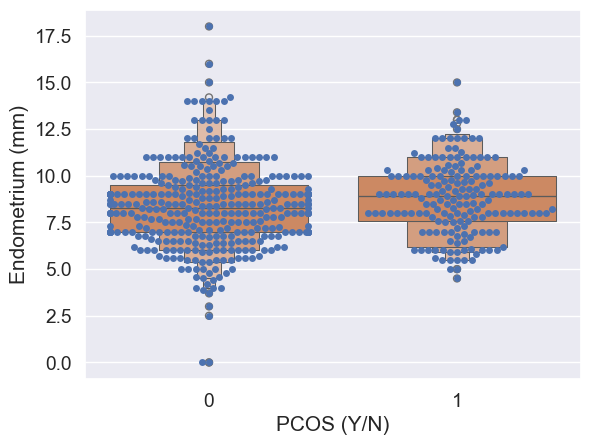

c:\Users\rahim\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3398: UserWarning: 32.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


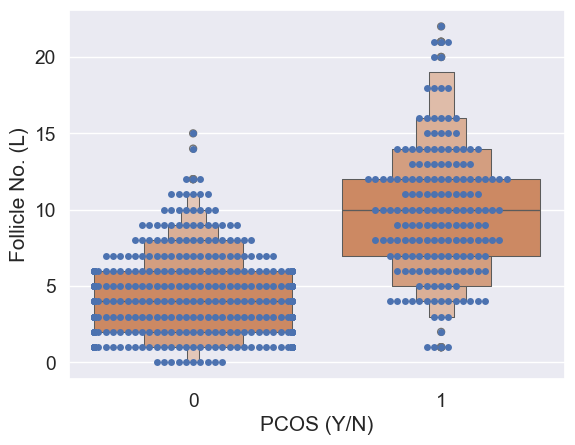

c:\Users\rahim\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3398: UserWarning: 30.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


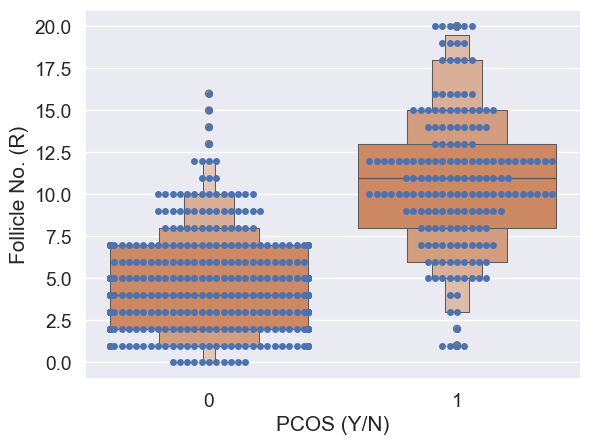

In [160]:
features = ["Age (yrs)","Weight (Kg)", "BMI", "Hb(g/dl)", "Cycle length(days)","Endometrium (mm)", "Follicle No. (L)", "Follicle No. (R)" ]
for i in features:
    sns.swarmplot(x=pcoWoInf["PCOS (Y/N)"], y=pcoWoInf[i])
    sns.boxenplot(x=pcoWoInf["PCOS (Y/N)"], y=pcoWoInf[i])
    plt.show()